In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns

# Initialization

In [4]:
# Was lui en had geen zin in een if of for
def plot_dens3(x):
  plt.hist(hist, color = ['b', 'r', 'y'], edgecolor = 'black',
          bins = int(180/5))

  sns.distplot(hist, hist=True, kde=False, 
              bins=int(180/5), color = 'blue',
              hist_kws={'edgecolor':'black'})

  plt.title('Histogram of density')
  plt.xlabel('Binned values')
  plt.ylabel('Amount')

def plot_dens2(x):
  plt.hist(hist, color = ['b', 'r'], edgecolor = 'black',
          bins = int(180/5))

  sns.distplot(hist, hist=True, kde=False, 
              bins=int(180/5), color = 'blue',
              hist_kws={'edgecolor':'black'})

  plt.title('Histogram of X and Y density')
  plt.xlabel('Binned values of X and Y')
  plt.ylabel('Amount')

def plot_dens1(x):
  plt.hist(hist, color = ['b'], edgecolor = 'black',
          bins = int(180/5))

  sns.distplot(hist, hist=True, kde=False, 
              bins=int(180/5), color = 'blue',
              hist_kws={'edgecolor':'black'})

  plt.title('Histogram of density')
  plt.xlabel('Binned values')
  plt.ylabel('Amount')

In [5]:
#for pereptron learning
#sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))


alpha = 0.01
xin = []
with open('x.ext') as my_file:
    for line in my_file:
        xin.append(line.split())
del xin[-2:]
# xin.pop()
# xin.pop()
print(xin)
xin = np.array(xin)
print(xin)


tin = []
with open('t.ext') as my_file:
    for line in my_file:
      tin.append((line.split()))
          

    

del tin[-1:]

print(tin)
tin = np.array(tin)
tin=tin.astype(float)
xin=xin.astype(float)

print(np.dot(xin.T,tin))


#p_densPerceptron
def p_dens(w,y):
  E = objectivePerceptron(w,y)
  return np.exp(-E)


def ylearnget(w):
   a=np.dot(xin,w)
   return sigmoid(a)

# gradient and objective for perceptron learning (note )
def gradientPerceptron(w,y):
  a=np.dot(xin,w) # w is the input , x is from x.ext (we compute the probability of the parameters w)
  y=sigmoid(a) #sigmoid function (outpuds)
  e=tin-y # error between given output patterns t (t.ext) and y
  g=-x.T*e #gradient
  gM = alpha*w+g  #learning rule w+= alpha (learning rate) * gradient
  return gM


def objectivePerceptron(w,y): #objective function
  G= - (tin.T * np.log(y)+(1-tin.T)*np.log(1-y)) #y was computed in gradientPerceptron , t from t.ext
  EW= np.dot(w.T,w) / 2 #total of w^2
  M= G + alpha * EW  #value of objective funcition (measure of error)
  return M

[['1', '2', '3'], ['1', '3', '2'], ['1', '3', '6'], ['1', '5.5', '4.5'], ['1', '5', '3'], ['1', '7', '4'], ['1', '5', '6'], ['1', '8', '6'], ['1', '9.5', '5'], ['1', '9', '7']]
[['1' '2' '3']
 ['1' '3' '2']
 ['1' '3' '6']
 ['1' '5.5' '4.5']
 ['1' '5' '3']
 ['1' '7' '4']
 ['1' '5' '6']
 ['1' '8' '6']
 ['1' '9.5' '5']
 ['1' '9' '7']]
[['0'], ['0'], ['0'], ['0'], ['0'], ['1'], ['1'], ['1'], ['1'], ['1']]
[[ 5. ]
 [38.5]
 [28. ]]


# Bayesian inference for Perceptron learning with MCMC

## Hamilton Monte Carlo

In [6]:
# hamilton monte-carlo method for learning problem
alpha=0.1
epsilon=0.03

def sigmoid(x):
  return 1/(1+np.exp(-x))

def gradM(w):
  a=np.dot(xin,w) # w is the input , x is from x.ext (we compute the probability of the parameters w)
  y=sigmoid(a) #sigmoid function (outpuds)
  e=tin-y[0] # error between given output patterns t (t.ext) and y
  g=-np.dot(xin.T,e) #maybe not a dot product #gradient
  gM = alpha*w+g[0]  #learning rule w+= alpha (learning rate) * gradient
  return gM


def findM(w): #objective function
  a=np.dot(xin,w) #recompute y
  y=sigmoid(a) 

  G= - (tin.T * np.log(y)+(1-tin.T)*np.log(1-y)) #y was computed in gradientPerceptron , t from t.ext
  EW= np.dot(w.T,w) / 2 #total of w^2
  M= G + alpha * EW  #value of objective funcition (measure of error)
  return M

# def Energy(x):
#   return 1/2 * np.dot(np.transpose(x),np.dot(A,x))

# def gradientE(x):
#   g=np.array([x[0]*250.25-249.75*x[1],x[1]*250.25-249.75*x[0]])
#   return g

def hamilton_monte_carlo(steps, tau, epsilon, sigmav):
  w = np.random.normal(scale = sigmav,size=3)
  x_hist2=[]
  x_hist = np.array([])
  x2_hist = np.array([])
  x3_hist = np.array([])
  g = gradM(w) #set gradient from initial w
  M = findM(w) #set objective from initial w
  rejections=0

  for l in range(steps):
    p = np.random.normal(0, 1, len(w))
    H = np.dot(np.transpose(p), p) / 2 + M
    wnew = w
    gnew = g

    for s in range(tau):
      p = p - epsilon * g /2
      wnew = w + epsilon * p #!!!!!!!!!!!!!! += caused the error DO NOT USE
      gnew = gradM(wnew)
      p = p - epsilon * gnew /2
    
    Mnew = findM(w)
    Hnew = np.dot(np.transpose(p), p) /2 + Mnew
    dH = Hnew - H

    accept = False
    for i in range(dH.size): 
      if dH[0][i] < 0: 
        accept = True
      elif np.random.uniform(0,1) < np.exp(-dH)[0][i]:
        accept = True
      else:
        accept = False
    if accept:
      g = gnew
      w = wnew
      M = Mnew
    else:
      rejections+=1
    x_hist2.append(w)
    x_hist = np.append(x_hist, w[0])
    x2_hist = np.append(x2_hist, w[1])
    x3_hist = np.append(x3_hist, w[2])
  # plot_scatter(np.array(np.split(x_hist, steps)))

  #plotting
  data=x_hist
  print(data.shape)
  x_coordinate = [ 25 * i for i in range(len(data)) ]
  plt.plot(x_coordinate,data)
  plt.show()
  data=x2_hist
  print(data.shape)
  x_coordinate = [ 25 * i for i in range(len(data)) ]
  plt.plot(x_coordinate,data)
  plt.show()
  data=x3_hist
  print(data.shape)
  x_coordinate = [ 25 * i for i in range(len(data)) ]
  plt.plot(x_coordinate,data)
  plt.show()
  data=x_hist2
  x_coordinate = [ 25 * i for i in range(len(data)) ]
  plt.plot(x_coordinate,data)
  plt.show()
  
  return rejections, np.array(np.split(x_hist, steps))

(1000,)


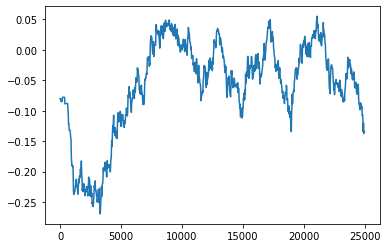

(1000,)


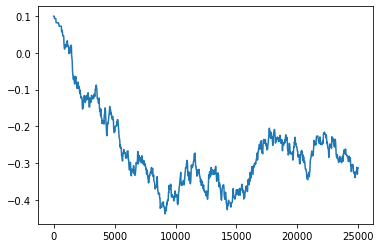

(1000,)


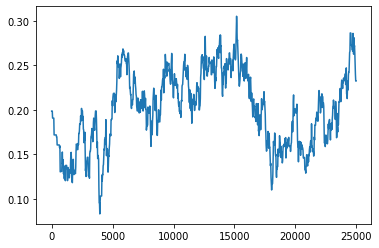

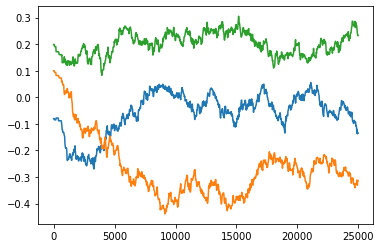

126


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


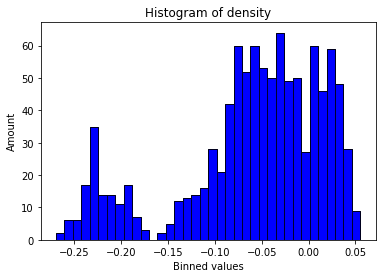

In [7]:
rejections, hist = hamilton_monte_carlo(1000,100,0.01,0.1)
print(rejections)
# print(hist)
plot_dens1(hist)

## Metropalis Hasting

In [10]:
#changed version for perceptron learning!!!!!!!!!!!
def plot_scatter(X):
 # colors = np.random.rand(len(hist))
 # area = (30 * np.random.rand(len(hist)))**2  # 0 to 15 point radii

  x = []
  y = []

  for i in X:
    x.append(i[0])
    y.append(i[1])

  plt.scatter(x, y)
  plt.show()

def accept(a):
  if np.isnan(a):
    return 0
  return np.random.binomial(1, min(a,1))

def metropalis_hasting(steps, sigma):
  rejections = 0
  x_hist = []
  init_x = np.random.normal(0,sigma,3)
  x = init_x
  for i in range(steps):
    x_new = np.random.normal(x,0.1,3)
    ylearn = ylearnget(x_new) #added for perceptron
    a = p_dens(x_new,ylearn)/p_dens(x,ylearn) 
    accep=False
    for i in range(len(a[0])): 
        if accept(a[0][i]) < 0: 
          accep=accep
        else:
          accep = True
    if accep:
      x = x_new
    else:
      rejections+=1
    x_hist.append(x)

  data=x_hist
  x_coordinate = [ i for i in range(len(data)) ]
  plt.plot(x_coordinate,data)
  plt.show()
  plot_scatter(x_hist)
  return (rejections, np.array(x_hist))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in multiply


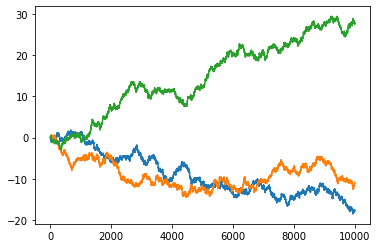

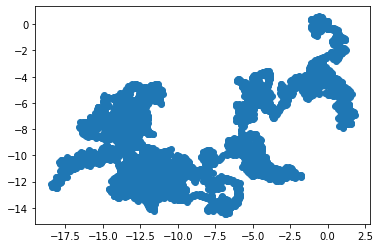

0
[[ 2.32396277e-02  9.01300174e-02 -2.64367570e-03]
 [ 2.35669801e-03  1.65023451e-01  1.40901435e-02]
 [-5.28831043e-02 -4.61727134e-02  1.56792390e-01]
 ...
 [-1.75863580e+01 -1.11235411e+01  2.74860217e+01]
 [-1.76198809e+01 -1.09328785e+01  2.77130921e+01]
 [-1.76224549e+01 -1.07817172e+01  2.76659781e+01]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


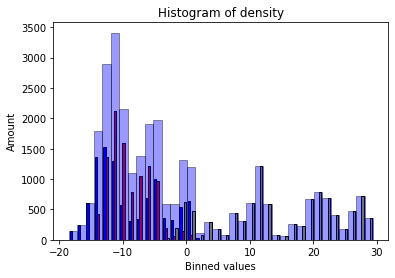

In [11]:
rejections, hist = metropalis_hasting(10000, 0.1)
print(rejections)
print(hist)
plot_dens3(hist)